In [276]:
import quandl
import pandas as pd

quandl.ApiConfig.api_key = 'tzxd26V8wHT__x5R7Jz-'

oil_list = [{'dataset' : 'CHRIS/ICE_B28'}]

sm_data = pd.read_csv('export_dataframe.csv')

df_ticker = pd.read_csv('ticker_list.csv')
ticker_list = df_ticker['Ticker'].values.tolist()


oil_args =  {'returns':'pandas',
                'start_date' : '2014-08-20', 
                'end_date' : '2019-10-19',
                'collapse' : 'daily'}


def load_data(dic_list, static_args):
    
    data = []
    for i in range(len(dic_list)):

        
        try:
            ts_args = {**static_args, **dic_list[i]}
            timeseries_data = quandl.get(**ts_args)
            data.append(timeseries_data)
            
        except:
            pass
        
#         print(i)
            
    return data


def stitch_data(data):
    data = pd.concat(data, axis=0)
    return data

oil_data = load_data(oil_list, oil_args)

In [277]:
oil_data = oil_data[0]['Change']
sm_data = sm_data.groupby(['date']).mean()

oil_data = pd.DataFrame(oil_data)
oil_data.index = pd.to_datetime(oil_data.index)
sm_data.index = pd.to_datetime(sm_data.index).rename('Date')
# sm_data['date'] = pd.to_datetime(sm_data['date'])
# sm_data = sm_data.reindex(sm_data['date'])

df_tot = oil_data.join(sm_data)
df_tot = df_tot.dropna()

df_tot['Change'][df_tot['Change'] < 0] = 0
df_tot['Change'][df_tot['Change'] > 0] = 1

In [278]:
df_tot

,Change,fans,new_fans,admin_post_count,admin_post_likes,admin_post_comments,admin_post_shares,admin_post_reach,admin_post_impressions,engagement_score_x,...,retweets_count,replies_count,favorites_count,total_tweets_count,average_reply_time,engagement_score_y,followers_count_y,likes_count,total_posts_count,engagement_score
Date,,,,,,,,,,,,,,,,,,,,,
2014-08-20,0.0,590521.000000,375.000000,2.000000,619.000000,244.000000,156.000000,0.000000,0.000000,337.000000,...,18.000000,1.000000,22.000000,3783.000000,0.000000,467.000000,0.000000,0.000000,0.000000,0.000000
2014-08-21,0.0,590863.000000,342.000000,2.000000,487.000000,92.000000,66.000000,0.000000,0.000000,176.000000,...,21.000000,0.000000,56.000000,3787.000000,23833.000000,346.000000,0.000000,0.000000,0.000000,0.000000
2014-08-22,1.0,591121.000000,258.000000,2.000000,341.000000,136.000000,46.000000,0.000000,0.000000,164.000000,...,12.000000,1.000000,24.000000,3789.000000,118.000000,249.000000,0.000000,0.000000,0.000000,0.000000
2014-08-25,1.0,591799.000000,287.000000,2.000000,784.000000,262.000000,218.000000,0.000000,0.000000,403.000000,...,39.000000,10.000000,67.000000,3792.000000,850.000000,527.000000,0.000000,0.000000,0.000000,0.000000
2014-08-26,0.0,592089.000000,290.000000,1.000000,1059.000000,225.000000,16.000000,0.000000,0.000000,432.000000,...,5.000000,1.000000,19.000000,3794.000000,1617.000000,0.000000,0.000000,82.000000,0.000000,0.000000
2014-08-27,1.0,592449.000000,360.000000,4.000000,981.000000,2523.000000,165.000000,0.000000,0.000000,601.000000,...,4.000000,46.000000,1.000000,3800.000000,48481.000000,85.000000,0.000000,0.000000,0.000000,0.000000
2014-08-28,0.0,592542.000000,93.000000,2.000000,163.000000,56.000000,10.000000,0.000000,0.000000,63.000000,...,18.000000,3.000000,29.000000,3802.000000,24004.000000,455.000000,0.000000,0.000000,0.000000,0.000000
2014-08-29,0.0,592575.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,0.000000,11.000000,3805.000000,3707.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2014-09-01,0.0,592686.000000,28.000000,1.000000,702.000000,525.000000,27.000000,0.000000,0.000000,580.000000,...,0.000000,0.000000,0.000000,3808.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [279]:
df_tot = df_tot[['Change', 'fans', 'new_fans', 'admin_post_likes',
       'admin_post_comments', 'admin_post_reach',
       'engagement_score_x', 'people_talking_about',
       'organic-admin_post_count', 'organic-admin_post_likes',
       'organic-admin_post_comments', 'organic-admin_post_shares',
       'organic-admin_post_reach', 'organic-admin_post_impressions',
       'organic-engagement_score', 'followers_count_x', 'followees_count',
       'tweets_count', 'retweets_count', 'replies_count', 'favorites_count',
       'total_tweets_count', 'average_reply_time', 'engagement_score_y',
       'followers_count_y', 'likes_count', 'total_posts_count',
       'engagement_score']]
df_tot = df_tot[pd.to_datetime('2015-06-01')::]

In [280]:
df_tot

,Change,fans,new_fans,admin_post_likes,admin_post_comments,admin_post_reach,engagement_score_x,people_talking_about,organic-admin_post_count,organic-admin_post_likes,...,retweets_count,replies_count,favorites_count,total_tweets_count,average_reply_time,engagement_score_y,followers_count_y,likes_count,total_posts_count,engagement_score
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-01,0.0,767778.000000,412.000000,626.000000,75.000000,0.000000,121.000000,3816.000000,4.000000,626.000000,...,11.000000,1.000000,21.000000,4991.000000,974.000000,214.000000,1683.000000,0.000000,113.000000,0.000000
2015-06-02,1.0,384217.500000,328.500000,66.000000,144.000000,0.000000,136.500000,2121.000000,1.000000,66.000000,...,54.000000,42.000000,108.000000,4993.000000,7879.000000,523.000000,1703.000000,0.000000,113.000000,0.000000
2015-06-03,0.0,384282.500000,65.000000,42.000000,15.500000,0.000000,28.000000,2121.000000,1.000000,42.000000,...,203.000000,51.000000,798.000000,5001.000000,10825.000000,551.000000,1711.000000,0.000000,113.000000,0.000000
2015-06-04,0.0,384314.500000,32.000000,113.000000,168.000000,0.000000,154.000000,2335.000000,1.500000,113.000000,...,22.000000,7.000000,55.000000,5013.000000,21279.000000,428.000000,1721.000000,51.000000,114.000000,584.000000
2015-06-05,1.0,384356.000000,41.500000,119.000000,15.000000,0.000000,42.500000,2572.500000,1.000000,119.000000,...,7.000000,3.000000,17.000000,5018.000000,4343.000000,155.000000,1735.000000,85.000000,115.000000,778.000000
2015-06-08,0.0,384435.000000,31.500000,108.000000,12.000000,0.000000,48.000000,2528.500000,1.000000,108.000000,...,10.000000,7.000000,10.000000,5040.000000,13987.000000,157.000000,1758.000000,53.000000,116.000000,612.000000
2015-06-09,1.0,769033.000000,163.000000,60.000000,157.000000,0.000000,154.000000,4259.000000,1.000000,60.000000,...,105.000000,55.000000,354.000000,5052.000000,10676.000000,391.000000,1772.000000,0.000000,116.000000,0.000000
2015-06-10,1.0,385219.500000,83.500000,55.500000,9.500000,0.000000,198.000000,2108.500000,1.000000,55.500000,...,7.000000,6.000000,7.000000,5069.000000,13677.000000,52.000000,1784.000000,58.000000,117.000000,633.000000
2015-06-11,0.0,385297.000000,77.500000,109.000000,96.000000,0.000000,599.000000,1853.000000,1.500000,109.000000,...,11.000000,7.000000,30.000000,5081.000000,10668.000000,204.000000,1796.000000,0.000000,117.000000,0.000000


In [281]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

df=df_tot
targets = df['Change'].shift(-1)
df = df.iloc[:-1]
targets = targets.iloc[:-1]

accuracy = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(df, targets, test_size=0.2)

    rf_clf = RandomForestClassifier(n_estimators=50, max_depth=1)
    rf_clf.fit(X_train, y_train)

    y_pred = rf_clf.predict(X_test)
    
    accuracy.append(accuracy_score(y_pred, y_test))

0.5430044843049328


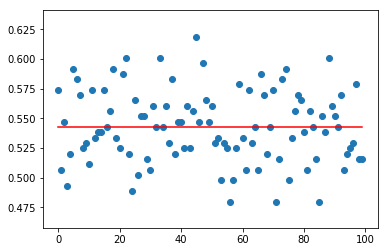

In [282]:
import matplotlib.pyplot as plt

number = np.arange(0,len(accuracy),1)
plt.scatter(number, accuracy)

accuracy_nu = []
for i in number:
    accuracy_nu.append(np.mean(accuracy))

plt.plot(number, accuracy_nu, color = 'r')

print(np.mean(accuracy))